# Data Processing and Cleaning



## Data Source #1

In [ ]:
# download required dependencies
!pip install jsonlines
import pandas as pd
import jsonlines
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# import google drive as all data is uploaded there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# opens data source #1
data = []

with jsonlines.open('/content/drive/MyDrive/Datasets for Project/News_Category_Dataset_v3.json') as reader:
    for obj in reader:
        data.append(obj)

# Convert the list into a DataFrame
df1 = pd.DataFrame(data)

In [ ]:
# checks all column names
print(df1.columns)
df1.head()

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
# checking for missing values
print("Number of missing values:", df1.isnull().sum())

Number of missing values: link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64


In [ ]:
# Standardizing date format
df1['date'] = pd.to_datetime(df1['date'])

In [ ]:
# lower-casing each headline and description
df1['headline'] = df1['headline'].str.lower()
df1['short_description'] = df1['short_description'].str.lower()

In [ ]:
# removing punctuation from each headline and description
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [ ]:
df1['headline'] = df1['headline'].apply(remove_punctuation)
df1['short_description'] = df1['short_description'].apply(remove_punctuation)

df1.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,over 4 million americans roll up sleeves for o...,U.S. NEWS,health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,american airlines flyer charged banned for lif...,U.S. NEWS,he was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 of the funniest tweets about cats and dogs ...,COMEDY,until you have a dog you dont understand what ...,Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,the funniest tweets from parents this week sep...,PARENTING,accidentally put grownup toothpaste on my todd...,Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,woman who called cops on black birdwatcher los...,U.S. NEWS,amy cooper accused investment firm franklin te...,Nina Golgowski,2022-09-22


In [ ]:
# removing stop words

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join the list of words back to a single string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df1['headline'] = df1['headline'].apply(remove_stop_words)
df1['short_description'] = df1['short_description'].apply(remove_stop_words)

In [ ]:
df1['headline'] = df1['headline'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)
df1['short_description'] = df1['short_description'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)
# drops duplicates
df1.drop_duplicates(inplace=True)

In [ ]:
# Sanity check to ensure data is processed
print(df1.isnull().sum())
print(df1.dtypes)
print(df1['headline'].head(10))
print(df1['short_description'].head(10))
df1_tuple = df1.applymap(lambda x: tuple(x) if type(x) == list else x)
print(df1_tuple.duplicated().sum())


link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64
link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object
0    4 million americans roll sleeves omicrontarget...
1    american airlines flyer charged banned life pu...
2          23 funniest tweets cats dogs week sept 1723
3               funniest tweets parents week sept 1723
4    woman called cops black birdwatcher loses laws...
5    cleaner dead belk bathroom 4 days body found p...
6    reporter gets adorable surprise boyfriend live tv
7    puerto ricans desperate water hurricane fiona ...
8    new documentary captures complexity child immi...
9      biden un call russian war affront bodys charter
Name: headline, dtype: object
0    health experts said early predict 

In [ ]:
# Make a sub-dataframe that only holds the headlines
# and descriptions for later training
subdf1 = df1[['headline', 'short_description']]
subdf1.head()

,headline,short_description
0,4 million americans roll sleeves omicrontarget...,health experts said early predict whether dema...
1,american airlines flyer charged banned life pu...,subdued passengers crew fled back aircraft con...
2,23 funniest tweets cats dogs week sept 1723,dog dont understand could eaten
3,funniest tweets parents week sept 1723,accidentally put grownup toothpaste toddler ’ ...
4,woman called cops black birdwatcher loses laws...,amy cooper accused investment firm franklin te...


## Data Source #2

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Datasets for Project/raw_partner_headlines.csv')

In [ ]:
df2.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,2,Agilent Technologies Announces Pricing of $5……...,http://www.gurufocus.com/news/1153187/agilent-...,GuruFocus,2020-06-01 00:00:00,A
1,3,Agilent (A) Gears Up for Q2 Earnings: What's i...,http://www.zacks.com/stock/news/931205/agilent...,Zacks,2020-05-18 00:00:00,A
2,4,J.P. Morgan Asset Management Announces Liquida...,http://www.gurufocus.com/news/1138923/jp-morga...,GuruFocus,2020-05-15 00:00:00,A
3,5,"Pershing Square Capital Management, L.P. Buys ...",http://www.gurufocus.com/news/1138704/pershing...,GuruFocus,2020-05-15 00:00:00,A
4,6,Agilent Awards Trilogy Sciences with a Golden ...,http://www.gurufocus.com/news/1134012/agilent-...,GuruFocus,2020-05-12 00:00:00,A


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845559 entries, 0 to 1845558
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   headline    object
 2   url         object
 3   publisher   object
 4   date        object
 5   stock       object
dtypes: int64(1), object(5)
memory usage: 84.5+ MB


In [ ]:
# check for missing values
df2.isnull().sum()


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [ ]:
# check for duplicate values
df2.duplicated().sum()


0

In [ ]:
# converts to lowercase
df2['headline'] = df2['headline'].str.lower()

In [ ]:
# removes punctuation
df2['headline'] = df2['headline'].apply(remove_punctuation)

In [ ]:
# remove stop words
df2['headline'] = df2['headline'].apply(remove_stop_words)

In [ ]:
# Sanity check to ensure data is processed
print(df2.isnull().sum())
print(df2.dtypes)
print(df2['headline'].head(10))
df2_tuple = df2.applymap(lambda x: tuple(x) if type(x) == list else x)
print(df2_tuple.duplicated().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object
0    agilent technologies announces pricing 5…… mil...
1                agilent gears q2 earnings whats cards
2    jp morgan asset management announces liquidati...
3    pershing square capital management lp buys agi...
4    agilent awards trilogy sciences golden ticket ...
5    agilent technologies inc ceo president michael...
6                         stocks growing earnings fast
7    cypress asset management inc buys verizon comm...
8    hendley co inc buys american electric power co...
9    teacher retirement system texas buys hologic i...
Name: headline, dtype: object
0


In [ ]:
# Make a sub-dataframe that only holds the headlines
# and descriptions for later training
subdf2 = df2[['headline']]
subdf2.head()

,headline
0,agilent technologies announces pricing 5…… mil...
1,agilent gears q2 earnings whats cards
2,jp morgan asset management announces liquidati...
3,pershing square capital management lp buys agi...
4,agilent awards trilogy sciences golden ticket ...


## Data Source #3

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Datasets for Project/VOX_today_explained_podcast_transcripts.csv')

In [ ]:
# Looking at the first few rows
print(df3.head())
print(df3.info())

                  date                episodeName speakerName  \
0  2020-04-29 00:00:00  04.29.20 / FOOD SHORTAGE          NaN   
1  2020-04-29 00:00:00  04.29.20 / FOOD SHORTAGE          NaN   
2  2020-04-29 00:00:00  04.29.20 / FOOD SHORTAGE          NaN   
3  2020-04-29 00:00:00  04.29.20 / FOOD SHORTAGE          NaN   
4  2020-04-29 00:00:00  04.29.20 / FOOD SHORTAGE          NaN   

                                                text  speech_nr  episode_nr  
0  [NEWS]\n\nSEAN RAMESWARAM (host): It’s Wednesd...          1           1  
1  The Food and Drug Administration is planning t...          2           1  
2  The Brad Pitt of infectious disease doctors, A...          3           1  
3  And just a reminder that remdesivir is not a v...          4           1  
4               But good news, is good news, right?           5           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44281 entries, 0 to 44280
Data columns (total 6 columns):
 #   Column       Non-Null Count 

In [ ]:
# Checking for duplicates
print("Number of duplicate rows:", df3.duplicated().sum())


Number of duplicate rows: 16


In [ ]:
# Removing duplicates
df3.drop_duplicates(inplace=True)


In [ ]:
# checking for missing values
print("Number of missing values:", df3.isnull().sum())


Number of missing values: date              0
episodeName       0
speakerName    7841
text             32
speech_nr         0
episode_nr        0
dtype: int64


In [ ]:
# remove rows with missing values
df3.dropna(inplace=True)


In [ ]:
# converts to lowercase
df3['text'] = df3['text'].str.lower()

In [ ]:
# Removing punctuation, stop words
df3['text'] = df3['text'].apply(remove_punctuation)
df3['text'] = df3['text'].apply(remove_stop_words)

df3.head()

,date,episodeName,speakerName,text,speech_nr,episode_nr
13,2020-04-29 00:00:00,04.29.20 / FOOD SHORTAGE,SEAN,month half ago starting get real united states...,14,1
14,2020-04-29 00:00:00,04.29.20 / FOOD SHORTAGE,SEAN,lot wanted know nation ’ food supply — thing g...,15,1
15,2020-04-29 00:00:00,04.29.20 / FOOD SHORTAGE,SEAN,asked people know told us ’ worry enough food,16,1
16,2020-04-29 00:00:00,04.29.20 / FOOD SHORTAGE,SEAN,looks like ’ still case,17,1
17,2020-04-29 00:00:00,04.29.20 / FOOD SHORTAGE,SEAN,fuller picture pandemic food system,18,1


In [ ]:
# Sanity check to ensure data is processed
print(df3.isnull().sum())
print(df3.dtypes)
print(df3['text'].head(10))
df3_tuple = df3.applymap(lambda x: tuple(x) if type(x) == list else x)
print(df3_tuple.duplicated().sum())

date           0
episodeName    0
speakerName    0
text           0
speech_nr      0
episode_nr     0
dtype: int64
date           object
episodeName    object
speakerName    object
text           object
speech_nr       int64
episode_nr      int64
dtype: object
13    month half ago starting get real united states...
14    lot wanted know nation ’ food supply — thing g...
15        asked people know told us ’ worry enough food
16                              looks like ’ still case
17                  fuller picture pandemic food system
18                                         farmers much
19                           food banks ’ nearly enough
20                            food workers getting sick
21    helena bottemiller evich covering angles politico
22     know think seeing unprecedented level disruption
Name: text, dtype: object
0


In [ ]:
# Make a sub-dataframe that only holds the text for later training
subdf3 = df3[['text']]
subdf3.head()

,text
13,month half ago starting get real united states...
14,lot wanted know nation ’ food supply — thing g...
15,asked people know told us ’ worry enough food
16,looks like ’ still case
17,fuller picture pandemic food system


## Dataset #4

In [ ]:
# Load spreadsheet
xl = pd.ExcelFile('/content/drive/MyDrive/Datasets for Project/Interviews.xlsx')

# Load a sheet into a DataFrame by name
df4 = xl.parse('Sheet1')


In [ ]:
print(df4.head())

   Unnamed: 0  index      ID        Date  \
0           0      0  420303  2020-05-29   
1           1      1  417918  2020-05-26   
2           2      2  415868  2020-05-21   
3           3      3  412077  2020-05-14   
4           4      4  401491  2020-05-09   

                                              Titles Company  \
0  Find the K closest points to origin using Prio...  Amazon   
1  Amazon Interview Experience | SDE (1.5 Year Ex...  Amazon   
2  Amazon Scotland Interview Experience - Geeksfo...  Amazon   
3  AWS Cloud Support Associate Interview Experien...  Amazon   
4  Print all nodes at distance K from given node:...  Amazon   

                                          Experience  Upvotes  \
0  Given a list of n points on 2D plane, the task...        3   
1  Round 1 – Online Coding Round on Amcat Platfor...        3   
2  Amazon Scotland was hiring for the position of...        1   
3  Hi everyone. I got placed as Cloud Support Ass...        0   
4     Consider the above-

In [ ]:
# Checking for duplicates
print("Number of duplicate rows:", df4.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
# checking for missing values
print("Number of missing values:", df4.isnull().sum())


Number of missing values: Unnamed: 0    0
index         0
ID            0
Date          0
Titles        0
Company       0
Experience    0
Upvotes       0
URLS          0
dtype: int64


In [ ]:
# converts to lowercase
df4['Titles'] = df4['Titles'].str.lower()
df4['Experience'] = df4['Experience'].str.lower()

# Removing punctuation, stop words
df4['Titles'] = df4['Titles'].apply(remove_punctuation)
df4['Experience'] = df4['Experience'].apply(remove_punctuation)

df4['Titles'] = df4['Titles'].apply(remove_stop_words)
df4['Experience'] = df4['Experience'].apply(remove_stop_words)

df4.head()

,Unnamed: 0,index,ID,Date,Titles,Company,Experience,Upvotes,URLS
0,0,0,420303,2020-05-29,find k closest points origin using priority qu...,Amazon,given list n points 2d plane task find k k n c...,3,https://www.geeksforgeeks.org/find-the-k-close...
1,1,1,417918,2020-05-26,amazon interview experience sde 15 year experi...,Amazon,round 1 – online coding round amcat platform 1...,3,https://www.geeksforgeeks.org/amazon-interview...
2,2,2,415868,2020-05-21,amazon scotland interview experience geeksforg...,Amazon,amazon scotland hiring position sde2 happened ...,1,https://www.geeksforgeeks.org/amazon-scotland-...
3,3,3,412077,2020-05-14,aws cloud support associate interview experien...,Amazon,hi everyone got placed cloud support associate...,0,https://www.geeksforgeeks.org/aws-cloud-suppor...
4,4,4,401491,2020-05-09,print nodes distance k given node iterative ap...,Amazon,consider abovegiven tree target node 12 input ...,5,https://www.geeksforgeeks.org/print-all-nodes-...


In [ ]:
# Sanity check to ensure data is processed
print(df4.isnull().sum())
print(df4.dtypes)
print(df4['Titles'].head(10))
print(df4['Experience'].head(10))
df4_tuple = df4.applymap(lambda x: tuple(x) if type(x) == list else x)
print(df4_tuple.duplicated().sum())

Unnamed: 0    0
index         0
ID            0
Date          0
Titles        0
Company       0
Experience    0
Upvotes       0
URLS          0
dtype: int64
Unnamed: 0     int64
index          int64
ID             int64
Date          object
Titles        object
Company       object
Experience    object
Upvotes        int64
URLS          object
dtype: object
0    find k closest points origin using priority qu...
1    amazon interview experience sde 15 year experi...
2    amazon scotland interview experience geeksforg...
3    aws cloud support associate interview experien...
4    print nodes distance k given node iterative ap...
5    find string formed joining k consecutive nodes...
6    amazon interview experience sde1 wow 2020 geek...
7       amazon interview experience sde2 geeksforgeeks
8    amazon interview experience offcampus 2020 pro...
9    amazon sde1 interview experience amazon wow202...
Name: Titles, dtype: object
0    given list n points 2d plane task find k k n c...
1    ro

In [ ]:
# Make a sub-dataframe for later training
subdf4 = df4[['Titles', 'Experience']]
subdf4.head()

,Titles,Experience
0,find k closest points origin using priority qu...,given list n points 2d plane task find k k n c...
1,amazon interview experience sde 15 year experi...,round 1 – online coding round amcat platform 1...
2,amazon scotland interview experience geeksforg...,amazon scotland hiring position sde2 happened ...
3,aws cloud support associate interview experien...,hi everyone got placed cloud support associate...
4,print nodes distance k given node iterative ap...,consider abovegiven tree target node 12 input ...



## Combining Datasets

In [ ]:
print("df1 sub columns:", subdf1.columns)
print("df2 sub columns:", subdf2.columns)
print("df3 sub columns:", subdf3.columns)
print("df4 sub columns:", subdf4.columns)

df1 sub columns: Index(['headline', 'short_description'], dtype='object')
df2 sub columns: Index(['headline'], dtype='object')
df3 sub columns: Index(['text'], dtype='object')
df4 sub columns: Index(['Titles', 'Experience'], dtype='object')


In [ ]:
subdf1 = subdf1.rename(columns={'headline': 'headline', 'short_description': 'description'})
subdf2 = subdf2.rename(columns={'headline': 'headline'})
subdf2['description'] = None
subdf3 = subdf3.rename(columns={'text': 'headline'})
subdf3['description'] = None
subdf4 = subdf4.rename(columns={'Titles': 'headline', 'Experience': 'description'})


In [ ]:
df = pd.concat([subdf1, subdf2, subdf3, subdf4], ignore_index=True)

In [ ]:
print(df.shape)

(2099231, 2)


In [ ]:
# checking to see if dataset was created successfully
print(df.columns)
print(df.head())
print(df.tail())

Index(['headline', 'description'], dtype='object')
                                            headline  \
0  4 million americans roll sleeves omicrontarget...   
1  american airlines flyer charged banned life pu...   
2        23 funniest tweets cats dogs week sept 1723   
3             funniest tweets parents week sept 1723   
4  woman called cops black birdwatcher loses laws...   

                                         description  
0  health experts said early predict whether dema...  
1  subdued passengers crew fled back aircraft con...  
2                    dog dont understand could eaten  
3  accidentally put grownup toothpaste toddler ’ ...  
4  amy cooper accused investment firm franklin te...  
                                                  headline  \
2099226  societe generale internship interview experien...   
2099227  societe generale campus placement drive geeksf...   
2099228  societe generale interview experience campus p...   
2099229  societe generale global s

In [ ]:
# checking simplified statistics of the datasets
datasets = {"sub df1": subdf1, "sub df2": subdf2, "sub df3": subdf3, "sub df4": subdf4}

for name, dataset in datasets.items():
    print(f"\nStatistics for {name}")

    # Print the shape of the dataset
    print(f"Shape: {dataset.shape}")

    # Print the column names
    print(f"Columns: {dataset.columns.tolist()}")

    # Print the number of data points in each column
    print("Number of data points in each column:")
    print(dataset.count())

    # Check for missing values
    print("Missing values in each column:")
    print(dataset.isnull().sum())



Statistics for sub df1
Shape: (209512, 2)
Columns: ['headline', 'description']
Number of data points in each column:
headline       209512
description    209512
dtype: int64
Missing values in each column:
headline       0
description    0
dtype: int64

Statistics for sub df2
Shape: (1845559, 2)
Columns: ['headline', 'description']
Number of data points in each column:
headline       1845559
description          0
dtype: int64
Missing values in each column:
headline             0
description    1845559
dtype: int64

Statistics for sub df3
Shape: (36392, 2)
Columns: ['headline', 'description']
Number of data points in each column:
headline       36392
description        0
dtype: int64
Missing values in each column:
headline           0
description    36392
dtype: int64

Statistics for sub df4
Shape: (7768, 2)
Columns: ['headline', 'description']
Number of data points in each column:
headline       7768
description    7768
dtype: int64
Missing values in each column:
headline       0
desc

In [ ]:
# Get the first 5 samples from 'headline' and 'description' columns
samples = df[['headline', 'description']].head(5)

# Iterate through the samples and print them as sentences
for index, row in samples.iterrows():
    print(f"Headline: {row['headline']}. Description: {row['description']}.")


Headline: 4 million americans roll sleeves omicrontargeted covid boosters. Description: health experts said early predict whether demand would match 171 million doses new boosters us ordered fall.
Headline: american airlines flyer charged banned life punching flight attendant video. Description: subdued passengers crew fled back aircraft confrontation according us attorneys office los angeles.
Headline: 23 funniest tweets cats dogs week sept 1723. Description: dog dont understand could eaten.
Headline: funniest tweets parents week sept 1723. Description: accidentally put grownup toothpaste toddler ’ toothbrush screamed like cleaning teeth carolina reaper dipped tabasco sauce.
Headline: woman called cops black birdwatcher loses lawsuit exemployer. Description: amy cooper accused investment firm franklin templeton unfairly firing branding racist video central park encounter went viral.


## Training

In [ ]:
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Assuming df is your DataFrame
df = df

# Combine "headline" and "description" into a single text
df.loc[:, 'Text'] = df.loc[:, 'headline'] + " " + df.loc[:, 'description']

# Check for and handle missing values
df['Text'] = df['Text'].fillna('')

# Get sentiment scores
df.loc[:, 'Sentiment_Score'] = df.loc[:, 'Text'].apply(get_sentiment)

# Convert sentiment scores to binary sentiment classes
df.loc[:, 'Sentiment'] = df.loc[:, 'Sentiment_Score'].apply(lambda score: 1 if score > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'Text'], df.loc[:, 'Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text using Bag-of-Words model
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model with increased max_iter
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

# Predict sentiment on the test set
y_pred = lr.predict(X_test_vec)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')


Accuracy: 0.9931546491936348
Precision: 0.9532604434377314
Recall: 0.92396031243403
F1 Score: 0.938381716049912


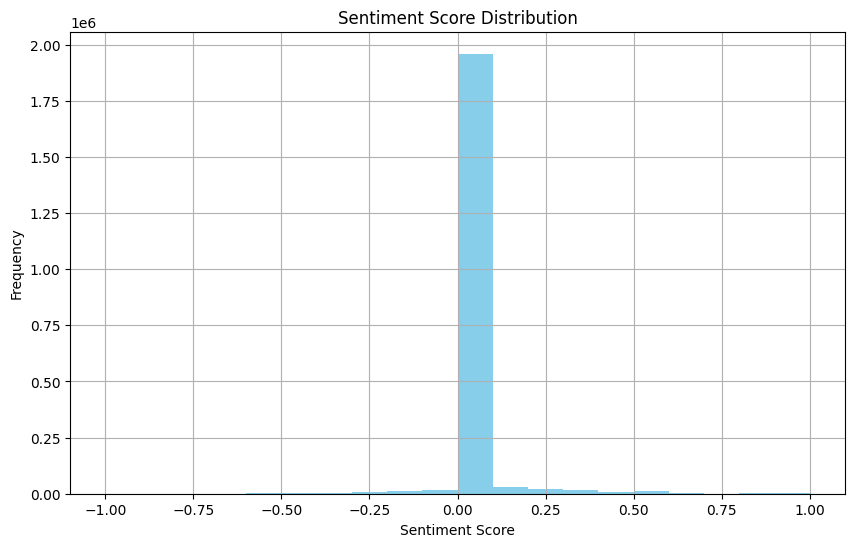

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Sentiment_Score' contains the sentiment scores
sentiment_scores = df['Sentiment_Score']

plt.figure(figsize=(10,6))
plt.hist(sentiment_scores, bins=20, color='skyblue')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

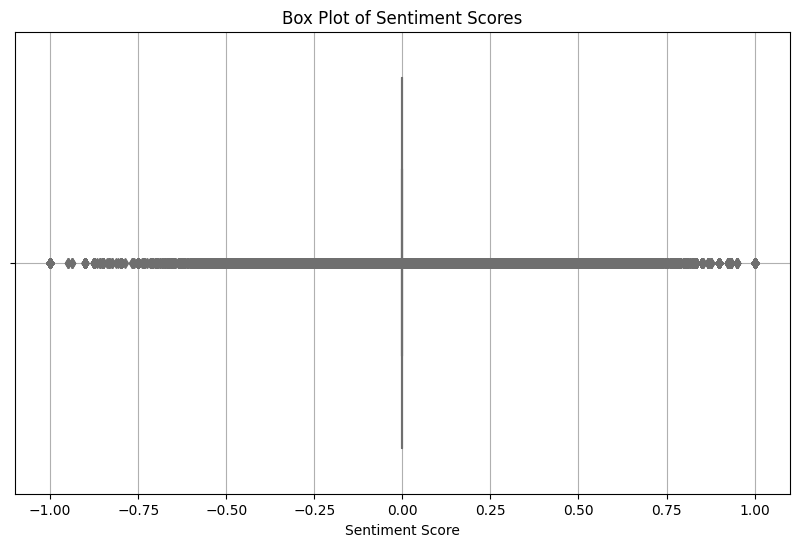

<ipython-input-51-70958835857a>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sentiment_scores, shade=True, color="skyblue")


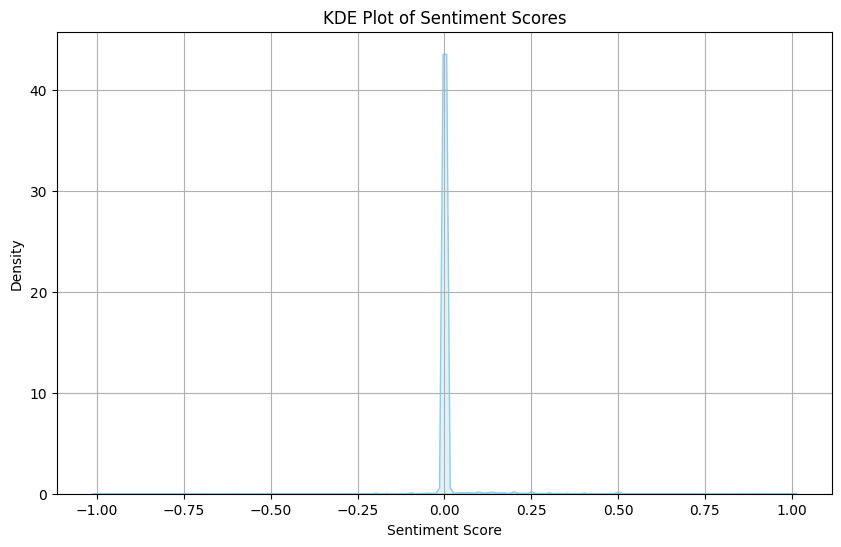

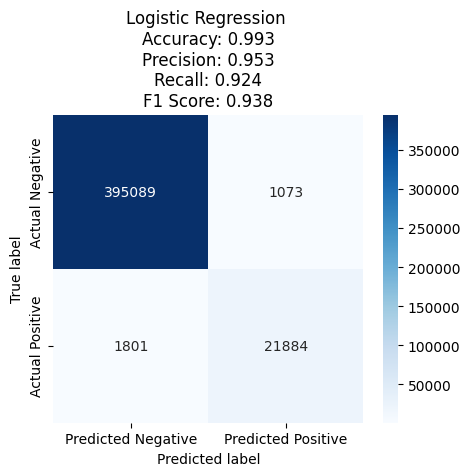

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Sentiment_Score' contains the sentiment scores
sentiment_scores = df['Sentiment_Score']

plt.figure(figsize=(10,6))
sns.boxplot(x=sentiment_scores, color='skyblue')
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(data=sentiment_scores, shade=True, color="skyblue")
plt.title('KDE Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)
plt.show()

# Model performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'],
                         index=['Actual Negative', 'Actual Positive'])

plt.figure(figsize=(5,4))

sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')

plt.title('Logistic Regression \nAccuracy: {0:.3f}\nPrecision: {1:.3f}\nRecall: {2:.3f}\nF1 Score: {3:.3f}'
          .format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## Audio datasets

In [ ]:
!pip install pydub
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 19.3 MB/s eta 0:00:00


In [ ]:
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

# creating a speech recognition object
r = sr.Recognizer()

# speech recognition in an audio file
def transcribe(path):
  with sr.AudioFile(path) as source:
    audio_listened = r.record(source)
    # convert to text
    transcription = r.recognize_google(audio_listened)
  return transcription

# splits audio into fragments by silence, recognizes speech
def split_large_audio(path):
  # opening the audio using pydub
  audio = AudioSegment.from_file(path)
  # if the silence is 600+ milisec, split
  fragments = split_on_silence(audio, min_silence_len=600,
                               silence_thresh=audio.dBFS-14,
                               keep_silence=500)
  folder_name = 'audio_fragments'
  # store the audio fragments
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  whole_text = ''
  # process each fragment
  for i, audio_fragment in enumerate(fragments, start=1):
    # save it in the folder_name
    fragment_filename = os.path.join(folder_name, f'fragment{i}.wav')
    audio_fragment.export(fragment_filename, format='wav')
    # recognize the speech in the fragment
    try:
      transcription = transcribe(fragment_filename)
    except sr.UnknownValueError as error:
      print("Error:", str(error))
    else:
      transcription = f'{transcription.capitalize()}. '
      print(fragment_filename, ":", transcription)
      whole_text += transcription
  return whole_text

In [ ]:
BASE_DIR = '/content/drive/MyDrive/Datasets for Project/audio'
path_single = os.path.join(BASE_DIR, 'VOX_single/test.wav')

single_text = split_large_audio(path_single)
print(single_text)

audio_fragments/fragment1.wav : Hey sean this weekend did you notice that the march for our lives returned i did notice yes did you hear much about it being you know a protest that happened all across this country of ours know that i didn't know i guess the past few weeks and maybe the past month has had me wondering. 
Error: 
audio_fragments/fragment3.wav : The gun control movement in this country. 
audio_fragments/fragment4.wav : Is a failure i mean it doesn't seem like a success. 
audio_fragments/fragment5.wav : So on the show today i thought we'd ask someone who's been studying this movement for decades and a guy who's been a part of it for decades to see how they feel about it and it's part of something we're going to try and do this week on the show is just understand this issue of guns in america understand it through the protest movement understand it constitutionally understand it politically because there might actually be some action in the coming weeks very cool i am lookin

In [ ]:
import random
'''BASE_DIR = '/content/drive/MyDrive/APS360 Project/audio'
dev_folder = os.path.join(BASE_DIR, 'VOX_dev')
test_folder = os.path.join(BASE_DIR, 'VOX_test')

dev_files = os.listdir(dev_folder)
test_files = os.listdir(test_folder)

dev_text = []
test_text = []

for i in range(len(dev_files)):
  new_audio = os.path.join(dev_folder, dev_files[i])
  dev_text.append(split_large_audio(new_audio))'''

BASE_DIR = '/content/drive/MyDrive/Datasets for Project/audio'
dev_folder = os.path.join(BASE_DIR, 'VOX_dev')
test_folder = os.path.join(BASE_DIR, 'VOX_test')

dev_files = os.listdir(dev_folder)
test_files = os.listdir(test_folder)

# Shuffle the file lists
random.shuffle(dev_files)
random.shuffle(test_files)

# Limit the number of files processed to 1/2 of the total
dev_files = dev_files[:len(dev_files)//2]
test_files = test_files[:len(test_files)//2]

dev_text = []
test_text = []

for i in range(len(dev_files)):
  new_audio = os.path.join(dev_folder, dev_files[i])
  dev_text.append(split_large_audio(new_audio))



audio_fragments/fragment1.wav : Even if what van and the white house are saying is all true. 
audio_fragments/fragment2.wav : The scare tactics have not worked children i want you to take a look at this point only about 36% of americans think global warming is a serious threat to our way of life. 
audio_fragments/fragment3.wav : However the scare tactics have not worked and don't you need public consensus to move the needle on this so how do you want to get public consensus by saying that it's not happening that it's not serious it's shorelines aren't flooding that we're not going to advise the police department. 
Error: 
audio_fragments/fragment5.wav : If you and you chose alaska which is remote generally but when you start remembering hurricane sandy. 
audio_fragments/fragment6.wav : The bottom half of manhattan was flooded the economic effect of that alone is enormous let alone the rebuilding infrastructure and so and we're in the developed world where people can get on the highway 

In [ ]:
#  BASE_DIR = '/content/drive/MyDrive/Datasets for Project/audio'
#  test_folder = os.path.join(BASE_DIR, 'VOX_test')
#  test_files = os.listdir(test_folder)
#  test_text = []

for i in range(len(test_files)):
  new_audio = os.path.join(test_folder, test_files[i])
  test_text.append(split_large_audio(new_audio))

audio_fragments/fragment1.wav : Hello and welcome back to real english with real teachers. 
audio_fragments/fragment2.wav : Today we've got a fantastic lesson for you we're going to be debating about fun topic that we think you are going to love. 
audio_fragments/fragment3.wav : If you were studying for any formal examinations in english at the moment like the ielts cambridge tofu this lesson is going to be so useful for you because we're going to show you how we naturally converse. 
audio_fragments/fragment4.wav : And use different expressions to give our opinions. 
audio_fragments/fragment5.wav : To agree with each other to disagree with each other. 
audio_fragments/fragment6.wav : Add to link our ideas with linking expressions if you're not studying for exams this lessons also going to help you to enrich your vocabulary in english. 
audio_fragments/fragment7.wav : To help you improve your listening skills. 
Error: 
audio_fragments/fragment9.wav : And enjoy the lesson and when it's f

In [ ]:
import re
from gensim.parsing.preprocessing import remove_stopwords

def transcript_cleaning(text):
  '''
  Applies lower-casing, gets rid of punctuation,
  removes stop words, converts into a dataframe.
  '''
  filtered_text = []
  for i in range(len(text)):
    text[i] = str.lower(text[i])
    text[i] = re.sub(r'[^\w\s]', '', text[i])
    filtered_sentence = remove_stopwords(text[i])
    filtered_text.append(filtered_sentence)
  df = pd.DataFrame(filtered_text)
  return df

In [ ]:
from nltk import tokenize

test_df = transcript_cleaning(test_text)
dev_df = transcript_cleaning(dev_text)

single_tokenized = tokenize.sent_tokenize(single_text)
single_df = transcript_cleaning(single_tokenized)

print(single_text)

# audio dataframes:
audio_df = pd.concat([dev_df, test_df, single_df], ignore_index=False)
# audio + textual dataframes (final version):
main_df = pd.concat([df, audio_df], ignore_index=False)

print("Audio df:",audio_df)
print("Main df", main_df)

Hey sean this weekend did you notice that the march for our lives returned i did notice yes did you hear much about it being you know a protest that happened all across this country of ours know that i didn't know i guess the past few weeks and maybe the past month has had me wondering. The gun control movement in this country. Is a failure i mean it doesn't seem like a success. So on the show today i thought we'd ask someone who's been studying this movement for decades and a guy who's been a part of it for decades to see how they feel about it and it's part of something we're going to try and do this week on the show is just understand this issue of guns in america understand it through the protest movement understand it constitutionally understand it politically because there might actually be some action in the coming weeks very cool i am looking forward to learning something. What if we could see cyber threats in real life they would be everywhere always watching looking to gain a

## Initial model

In [ ]:
import re
import pandas as pd
import numpy as np
from numpy import array
import tensorflow as tf
import torchtext
from torchtext import data
from time import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math

In [ ]:
# First, split the data into a training set and a temporary set using an 60-40 split.
X_temp, X_test, y_temp, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.4, random_state=42)

# Then, split the temporary set into validation and testing sets using a 50-50 split.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(np.unique(y_train))

[0 1]


In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 300
max_length = 250
trunc_type='post'

# tokenizing sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)  # tokenize the sentences in X_train
word_index = tokenizer.word_index

# Create sequences (i.e., transform text to a sequence of integers)
train_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_val)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences (i.e., add zeros to the sequences to make them all the same length)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

# convert to numpy arrays
y_train_np = y_train.values
y_val_np = y_val.values
y_test_np = y_test.values

# Sample 1/10th of the data
sample_fraction = 0.1

# Shuffle and slice train data
indices_train = np.random.permutation(len(train_padded))
idx_train = indices_train[:int(len(indices_train) * sample_fraction)]

train_padded_sample = train_padded[idx_train]
y_train_sample = y_train_np[idx_train]

# Shuffle and slice validation data
indices_val = np.random.permutation(len(val_padded))
idx_val = indices_val[:int(len(indices_val) * sample_fraction)]

val_padded_sample = val_padded[idx_val]
y_val_sample = y_val_np[idx_val]

# Shuffle and slice test data
indices_test = np.random.permutation(len(test_padded))
idx_test = indices_test[:int(len(indices_test) * sample_fraction)]

test_padded_sample = test_padded[idx_test]
y_test_sample = y_test_np[idx_test]

# Check the lengths
print(len(train_padded_sample), len(y_train_sample))
print(len(val_padded_sample), len(y_val_sample))
print(len(test_padded_sample), len(y_test_sample))


62976 62976
62976 62976
83969 83969


In [ ]:
# Importing pre-trained glove embeddings
import torchtext

glove = torchtext.vocab.GloVe(name='6B', dim=300)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399999/400000 [01:10<00:00, 5635.46it/s]


In [ ]:
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# LSTM model
class LSTM_model(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(LSTM_model, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True) # input_size should match the size of the word vectors
        self.fc = nn.Linear(hidden_size, num_class)

    def forward(self, x):
        # Look-up the embeddings
        x = self.emb(x)
        # Set the initial hidden states
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        # Forward propagate the RNN
        out, __ = self.rnn(x, (h0, c0))
        # Pass the output of the last step to the classifier
        return self.fc(out[:,-1,:])

In [ ]:
#from nltk.corpus.reader import reviews

def get_accuracy(model, data_loader):
    model.eval()
    with torch.no_grad():
        correct, total = 0, 0
        for reviews, sentiments in data_loader:  # change this line
            output = model(reviews)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(sentiments.view_as(pred)).sum().item()
            total += sentiments.shape[0]
    return correct / total

In [ ]:
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# LSTM model
class LSTM_model(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(LSTM_model, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True) # input_size should match the size of the word vectors
        self.fc = nn.Linear(hidden_size, num_class)

    def forward(self, x):
        # Look-up the embeddings
        x = self.emb(x)
        # Set the initial hidden states
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(device)
        # Forward propagate the RNN
        out, __ = self.rnn(x, (h0, c0))
        # Pass the output of the last step to the classifier
        return self.fc(out[:,-1,:])


def validation_loss(model, data_loader, criterion):
    total_val_loss = 0
    n = 0
    for reviews, sentiments in data_loader:
        reviews, sentiments = reviews.to(device), sentiments.to(device)
        recon = model(reviews)
        loss = criterion(recon, sentiments)
        total_val_loss += loss.item()
        n += 1
    return (total_val_loss/(n+1))

def train(model, train_loader, valid_loader, num_epochs=3, batch_size=512, learning_rate=0.01):
    torch.manual_seed(100)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    accumulation_steps = 4 # Modify as per requirement

    train_acc, train_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    val_acc, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)

    start_time = time.time()

    for epoch in range(num_epochs):
        total_train_loss = 0
        n = 0
        optimizer.zero_grad()
        for i, (reviews, sentiments) in enumerate(train_loader):
            reviews, sentiments = reviews.to(device), sentiments.to(device)
            outputs = model(reviews)
            loss = criterion(outputs, sentiments)
            loss.backward()

            if (i+1) % accumulation_steps == 0:  # Only update every 'accumulation_steps' batches
                optimizer.step()
                optimizer.zero_grad()

            total_train_loss += loss.item()
            n += 1

        # Assuming that the get_accuracy() function takes the model and the dataloader as parameters and computes the accuracy.
        train_acc[epoch] = get_accuracy(model, train_loader)
        train_loss[epoch] = total_train_loss / n
        val_acc[epoch] = get_accuracy(model, valid_loader)
        val_loss[epoch] = validation_loss(model, valid_loader, criterion)

        print(f"Epoch #{epoch+1}, Train accuracy: {train_acc[epoch]}, Val accuracy: {val_acc[epoch]}")

        model_path = f"model_bs{batch_size}_lr{learning_rate}_epoch{epoch}"
        torch.save(model.state_dict(), model_path)

        # Save the model after each epoch
        model_path = f"model_bs{batch_size}_lr{learning_rate}_epoch{epoch}"
        torch.save(model.state_dict(), model_path)

    end_time = time.time()

    # Plotting
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, label='Train')
    plt.plot(epochs, val_acc, label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Train')
    plt.plot(epochs, val_loss, label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Final Training Accuracy: {train_acc[-1]}")
    print(f"Final Validation Accuracy: {val_acc[-1]}")
    print(f"Total time elapsed: {end_time - start_time} seconds")

    return train_loss, val_loss, train_acc, val_acc


In [ ]:
import torch
from torchtext import data, datasets
from torchtext.vocab import GloVe
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer

batch_size = 512
train_data = torch.utils.data.TensorDataset(torch.tensor(train_padded, dtype=torch.long), torch.tensor(y_train.values))
valid_data = torch.utils.data.TensorDataset(torch.tensor(val_padded, dtype=torch.long), torch.tensor(y_val.values))
test_data = torch.utils.data.TensorDataset(torch.tensor(test_padded, dtype=torch.long), torch.tensor(y_test.values))

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

embedding_dim = 300 # Based on the actual size of your GloVe embeddings. Adjust if needed.
hidden_size = 30 # You can choose this.
num_classes = 2 # Binary classification.

# Create model
model = LSTM_model(embedding_dim, hidden_size, num_classes)
model = model.to(device)  # Move model to GPU

train(model, train_loader, valid_loader)





Epoch #1, Train accuracy: 0.9746748410925276, Val accuracy: 0.9734918676530601
Epoch #2, Train accuracy: 0.9802705436437805, Val accuracy: 0.9785556291275055


In [ ]:
import matplotlib.pyplot as plt

def plot_distribution(sentiments, title):
    positive_count = np.sum(sentiments)
    negative_count = len(sentiments) - positive_count
    plt.figure(figsize=(8, 5))
    plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
    plt.title(title)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot actual sentiment distribution in the validation set
plot_distribution(y_val.values, 'Actual Sentiment Distribution in Validation Set')

def get_predictions(model, data_loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds)
    return predictions

val_preds = get_predictions(model, valid_loader)

# Plot predicted sentiment distribution in the validation set
plot_distribution(val_preds, 'Predicted Sentiment Distribution in Validation Set')

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_val is your validation labels
cm = confusion_matrix(y_val.values, val_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
get_accuracy(model, test_loader)

In [ ]:
import torch
from torchtext import data, datasets
from torchtext.vocab import GloVe
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer

batch_size = 512
lr = 0.1
num_epochs = 3

embedding_dim = 300 # Based on the actual size of your GloVe embeddings. Adjust if needed.
hidden_size = 30 # You can choose this.
num_classes = 2 # Binary classification.

train_data = torch.utils.data.TensorDataset(torch.tensor(train_padded, dtype=torch.long), torch.tensor(y_train.values))
valid_data = torch.utils.data.TensorDataset(torch.tensor(val_padded, dtype=torch.long), torch.tensor(y_val.values))
test_data = torch.utils.data.TensorDataset(torch.tensor(test_padded, dtype=torch.long), torch.tensor(y_test.values))

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Create model
model = LSTM_model(embedding_dim, hidden_size, num_classes)
model = model.to(device)  # Move model to GPU

train(model, train_loader, valid_loader, num_epochs=num_epochs, batch_size=batch_size, learning_rate=lr)

In [ ]:
import torch
from torchtext import data, datasets
from torchtext.vocab import GloVe
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer

batch_size = 512
lr = 0.01
num_epochs = 3

embedding_dim = 300 # Based on the actual size of your GloVe embeddings. Adjust if needed.
hidden_size = 60 # You can choose this.
num_classes = 2 # Binary classification.

train_data = torch.utils.data.TensorDataset(torch.tensor(train_padded, dtype=torch.long), torch.tensor(y_train.values))
valid_data = torch.utils.data.TensorDataset(torch.tensor(val_padded, dtype=torch.long), torch.tensor(y_val.values))
test_data = torch.utils.data.TensorDataset(torch.tensor(test_padded, dtype=torch.long), torch.tensor(y_test.values))

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Create model
model = LSTM_model(embedding_dim, hidden_size, num_classes)
model = model.to(device)  # Move model to GPU

train(model, train_loader, valid_loader, num_epochs=num_epochs, batch_size=batch_size, learning_rate=lr)

In [ ]:
import torch
from torchtext import data, datasets
from torchtext.vocab import GloVe
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer

batch_size = 1028
lr = 0.1
num_epochs = 3

embedding_dim = 300 # Based on the actual size of your GloVe embeddings. Adjust if needed.
hidden_size = 60 # You can choose this.
num_classes = 2 # Binary classification.

train_data = torch.utils.data.TensorDataset(torch.tensor(train_padded, dtype=torch.long), torch.tensor(y_train.values))
valid_data = torch.utils.data.TensorDataset(torch.tensor(val_padded, dtype=torch.long), torch.tensor(y_val.values))
test_data = torch.utils.data.TensorDataset(torch.tensor(test_padded, dtype=torch.long), torch.tensor(y_test.values))

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Create model
model = LSTM_model(embedding_dim, hidden_size, num_classes)
model = model.to(device)  # Move model to GPU

train(model, train_loader, valid_loader, num_epochs=num_epochs, batch_size=batch_size, learning_rate=lr)

In [ ]:
import torch
from torchtext import data, datasets
from torchtext.vocab import GloVe
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer

batch_size = 512
train_data = torch.utils.data.TensorDataset(torch.tensor(train_padded, dtype=torch.long), torch.tensor(y_train.values))
valid_data = torch.utils.data.TensorDataset(torch.tensor(val_padded, dtype=torch.long), torch.tensor(y_val.values))
test_data = torch.utils.data.TensorDataset(torch.tensor(test_padded, dtype=torch.long), torch.tensor(y_test.values))

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

embedding_dim = 300 # Based on the actual size of your GloVe embeddings. Adjust if needed.
hidden_size = 30 # You can choose this.
num_classes = 2 # Binary classification.

# Create model
model = LSTM_model(embedding_dim, hidden_size, num_classes)
model = model.to(device)  # Move model to GPU

train(model, train_loader, valid_loader, num_epochs = 5)

## Demonstration

In [ ]:
def predict_sentiment(text):
    # Vectorizing the text
    text_vec = vectorizer.transform([text])

    # Predicting the sentiment
    sentiment = lr.predict(text_vec)

    return "Positive" if sentiment[0] == 1 else "Negative"

# Testing the function with a new sentence
new_sentence = "I love this product"
print(predict_sentiment(new_sentence))


In [ ]:
# Testing positive sentiments
pos_heading1 = "Promising new drug that could treat serious illnesses"
pos_heading2 = "Finally a perfect weather forecast for this weekend"
pos_heading3 = "The local hospital gets generous donations, nurses happy"
pos_heading4 = "Student robotics team wins the competition, the whole school is celebrating"

print(predict_sentiment(pos_heading1))
print(predict_sentiment(pos_heading2))
print(predict_sentiment(pos_heading3))
print(predict_sentiment(pos_heading4))

# Testing negative sentiments
neg_heading1 = "Serious floods destroy several cities, people are losing their homes"
neg_heading2 = "Toxic air quality becomes worse, more illnesses reported"
neg_heading3 = "Rising food prices make it difficult to buy basic products"
neg_heading4 = "20 people killed in the earthquake, 340 reported missing"

print(predict_sentiment(neg_heading1))
print(predict_sentiment(neg_heading2))
print(predict_sentiment(neg_heading3))
print(predict_sentiment(neg_heading4))